In [1]:
import json

In [2]:
import numpy as np

In [3]:
f  = open("Shutdown_aff.json", "r")
aff_data= json.load(f)

In [4]:
g = open("Shutdown_direct.json", "r")
direct_data = json.load(g)

In [5]:
import pandas as pd
import pickle as pic
h = open("tweet_frame.pickle", "rb" ) 
tweet_df = pd.DataFrame(pic.load(h))

In [6]:
republicans = open("republicans.txt", 'r').read().split("\n")
democrats = open("democrats.txt", 'r').read().split("\n")

In [7]:
import re
u = open("tid_to_uid.txt", 'r').read().split('\n')
tid_to_uid = {}
for each in u:
    try:
        tid_to_uid[str(each.split(" ")[0])] = str(each.split(" ")[1])
    except:
        print(each)

In [14]:
_dict = []
for key, val in aff_data.items():
    a1 = val.count(1)
    a2 = val.count(2)
    alpha = max(a1, a2)
    HAT_A_discerened_affiliation = 1 if a1>=a2 else 2
    HAT_A_discerened_affiliation = 0 if a1==a2 else HAT_A_discerened_affiliation
    task2 = direct_data[key]
    d1 = task2.count(1)
    d2 = task2.count(2)
    avg = (d1*(0)+d2*(10))/(d1+d2)
    this_frame = tweet_df[tweet_df["tweet_id"]==key+' ']
    this_tweet = ""
    if(len(this_frame) == 0):
        print(key+ " tweet not found")
    else:
        this_tweet = this_frame["tweet"].iloc[0]
    affiliation = None
    user_id = tid_to_uid[key]
    if user_id in republicans:
        affiliation = 2
    elif user_id in democrats:
        affiliation = 1
    else:
        print(user_id + " affiliation not known (userid not found in either files)")
    _map = {
            'tweet': this_tweet,
            'HAT_A_agreement_bin' : alpha, 
            'HAT_A_discerened_affiliation': HAT_A_discerened_affiliation,
            'HAT_direct_avg': avg,
            'affiliation': affiliation,
            'user_id': user_id
        }
    _dict.append(_map)
    

386147276949057536 tweet not found
389456753508642816 tweet not found
384178771978231808 tweet not found
384858527396683779 tweet not found
386270501384896513 tweet not found
383714000745549824 tweet not found
385105643503230976 tweet not found
387677539394519041 tweet not found
387672124359311360 tweet not found
384182591080759296 tweet not found
384823022202286080 tweet not found
388730929071796224 tweet not found
381072563633262592 tweet not found
385150085270884354 tweet not found
384661665284763648 tweet not found
387573157038534657 tweet not found
385892882910945280 tweet not found
384175905645424641 tweet not found
384678528463020032 tweet not found
389068477543092225 tweet not found
384879324731416576 tweet not found
384772486606254080 tweet not found
386543056721170432 tweet not found
389735092567830528 tweet not found
385049162682613760 tweet not found
389071389065367552 tweet not found
388523167641513984 tweet not found
384942489561341952 tweet not found
385395983393124352 t

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.DataFrame.from_records(_dict)
df

,HAT_A_agreement_bin,HAT_A_discerened_affiliation,HAT_direct_avg,affiliation,tweet,user_id
0,6,2,3.333333,2,rt @rac80: @gma @amykremer @roo09_roo the sun...,18822612
1,8,1,8.000000,1,,141405856
2,7,1,4.000000,2,everyone calm down. capitol hill club to rema...,16721461
3,8,1,5.555556,1,poll: just one in four approve of republicans...,24431892
4,10,1,7.000000,2,obama uses weekly address to demand congress ...,28885875
5,6,1,2.000000,2,rumor: house might go home after passing new ...,49224286
6,8,2,7.777778,2,rt @victoriataft: reid confirms dems will tar...,17387589
7,8,1,9.000000,1,,48038030
8,9,1,3.000000,2,,22299010
9,9,1,9.000000,1,rt @huffingtonpost: this gop congressman won'...,49021031


In [17]:
agreement_bin5 = df[df['HAT_A_agreement_bin'] == 5]["HAT_direct_avg"].as_matrix()
agreement_bin6 = df[df['HAT_A_agreement_bin'] == 6]["HAT_direct_avg"].as_matrix()
agreement_bin7 = df[df['HAT_A_agreement_bin'] == 7]["HAT_direct_avg"].as_matrix()
agreement_bin8 = df[df['HAT_A_agreement_bin'] == 8]["HAT_direct_avg"].as_matrix()
agreement_bin9 = df[df['HAT_A_agreement_bin'] == 9]["HAT_direct_avg"].as_matrix()
agreement_bin10 = df[df['HAT_A_agreement_bin'] == 10]["HAT_direct_avg"].as_matrix()

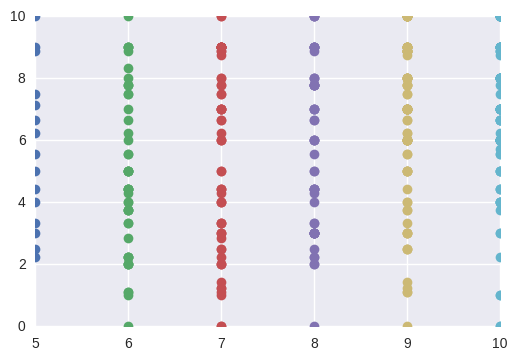

In [18]:
plt.figure()
temp = np.empty(len(agreement_bin5))
temp.fill(5)
plt.plot(temp, agreement_bin5, 'o')

temp = np.empty(len(agreement_bin6))
temp.fill(6)
plt.plot(temp, agreement_bin6, 'o')

temp = np.empty(len(agreement_bin7))
temp.fill(7)
plt.plot(temp, agreement_bin7, 'o')

temp = np.empty(len(agreement_bin8))
temp.fill(8)
plt.plot(temp, agreement_bin8, 'o')

temp = np.empty(len(agreement_bin9))
temp.fill(9)
plt.plot(temp, agreement_bin9, 'o')

temp = np.empty(len(agreement_bin10))
temp.fill(10)
plt.plot(temp, agreement_bin10, 'o')


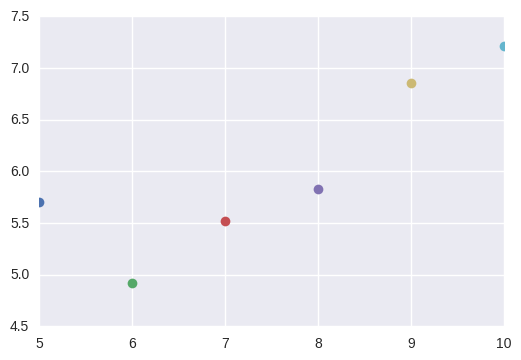

In [19]:
plt.figure()
plt.plot(5, np.average(agreement_bin5), 'o')
plt.plot(6, np.average(agreement_bin6), 'o')
plt.plot(7, np.average(agreement_bin7), 'o')
plt.plot(8, np.average(agreement_bin8), 'o')
plt.plot(9, np.average(agreement_bin9), 'o')
plt.plot(10, np.average(agreement_bin10), 'o')